In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn import svm

In [2]:
ofname=open('IDSgithub/files/ch05/dataset_small.pkl','rb')
(x,y)=pickle.load(ofname,encoding='latin1')

In [3]:
dims=x.shape[1]
N=x.shape[0]
print('Dims: '+str(dims)+', Samples: ',str(N))

Dims: 15, Samples:  4140


In [4]:
knn=neighbors.KNeighborsClassifier(n_neighbors=11)
knn.fit(x,y)
yhat=knn.predict(x)
print('Predicted Value: '+str(yhat[-1]),', Real Target: '+str(y[-1]))

Predicted Value: -1.0 , Real Target: -1.0


In [5]:
knn.score(x,y)

0.8316425120772947

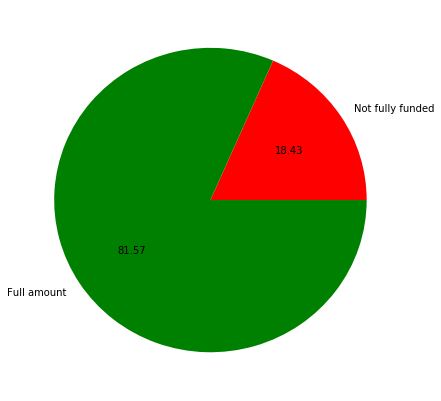

In [6]:
plt.pie(np.c_[np.sum(np.where(y==1,1,0)),np.sum(np.where(y==-1,1,0))][0],labels=['Not fully funded','Full amount'],colors=['r','g'],shadow=False,autopct='%.2f')
plt.gcf().set_size_inches((7,7))

In [7]:
yhat=knn.predict(x)
TP=np.sum(np.logical_and(yhat==-1,y==-1))
TN=np.sum(np.logical_and(yhat==1,y==1))
FP=np.sum(np.logical_and(yhat==-1,y==1))
FN=np.sum(np.logical_and(yhat==1,y==-1))
print('TP: ',str(TP))
print('FP: ',str(FP))
print('TN: ',str(TN))
print('FN: ',str(FN))

TP:  3370
FP:  690
TN:  73
FN:  7


In [8]:
metrics.confusion_matrix(yhat,y)

array([[3370,  690],
       [   7,   73]])

In [9]:
knn=neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
yhat=knn.predict(x)
print('Score: ',knn.score(x,y))
print('Classification Accuracy (Accuracy Score): ',str(metrics.accuracy_score(yhat,y)))
print('Confusion Matrix: \n',str(metrics.confusion_matrix(yhat,y)))

Score:  1.0
Classification Accuracy (Accuracy Score):  1.0
Confusion Matrix: 
 [[3377    0]
 [   0  763]]


In [10]:
perm=np.random.permutation(y.size)
PRC=0.7
split_point=int(np.ceil(y.shape[0]*PRC))
X_train=x[perm[:split_point].ravel(),:]
y_train=y[perm[:split_point].ravel()]
X_test=x[perm[split_point:].ravel(),:]
y_test=y[perm[split_point:].ravel()]
print('Training Shape: ',X_train.shape,', Training Targets Shape: ',y_train.shape)
print('Testing Shape: ',X_test.shape,', Testing Targets Shape',y_test.shape)

Training Shape:  (2898, 15) , Training Targets Shape:  (2898,)
Testing Shape:  (1242, 15) , Testing Targets Shape (1242,)


In [11]:
knn=neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
yhat=knn.predict(X_train)
print('TRAINING STATS: \n')
print('Score: ',knn.score(X_train,y_train))
print('Classification Accuracy: ',str(metrics.accuracy_score(yhat,y_train)))
print('Confusion Matrix: \n',metrics.confusion_matrix(yhat,y_train))

TRAINING STATS: 

Score:  1.0
Classification Accuracy:  1.0
Confusion Matrix: 
 [[2349    0]
 [   0  549]]


In [12]:
yhat=knn.predict(X_test)
print('TRAINING STATS: \n')
print('Score: ',knn.score(x,y))
print('Classification Accuracy (Accuracy Score): ',str(metrics.accuracy_score(yhat,y_test)))
print('Confusion Matrix: \n',metrics.confusion_matrix(yhat,y_test))

TRAINING STATS: 

Score:  0.9272946859903382
Classification Accuracy (Accuracy Score):  0.7576489533011272
Confusion Matrix: 
 [[863 136]
 [165  78]]


In [13]:
PRC=0.3
acc=np.zeros((10,))
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=PRC)
    knn=neighbors.KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    yhat=knn.predict(X_test)
    acc[i]=metrics.accuracy_score(yhat,y_test)
acc.shape=(1,10)
print('Mean Expected Error: ',str(np.mean(acc[0])))

Mean Expected Error:  0.75829307568438


In [14]:
PRC=0.1
acc_r=np.zeros((10,4))
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=PRC)
    nn1=neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3=neighbors.KNeighborsClassifier(n_neighbors=3)
    svc=svm.SVC()
    dt=tree.DecisionTreeClassifier()
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    acc_r[i][0]=metrics.accuracy_score(yhat_nn1,y_test)
    acc_r[i][1]=metrics.accuracy_score(yhat_nn3,y_test)
    acc_r[i][2]=metrics.accuracy_score(yhat_svc,y_test)
    acc_r[i][3]=metrics.accuracy_score(yhat_dt,y_test)
print(acc_r)

[[0.77536232 0.77777778 0.81884058 0.76570048]
 [0.73188406 0.78743961 0.81884058 0.79951691]
 [0.78502415 0.78985507 0.83816425 0.7705314 ]
 [0.78502415 0.81400966 0.81642512 0.77536232]
 [0.75845411 0.7705314  0.8115942  0.76811594]
 [0.76570048 0.81400966 0.83333333 0.75362319]
 [0.7826087  0.79468599 0.81884058 0.7826087 ]
 [0.74396135 0.76086957 0.82125604 0.76570048]
 [0.7294686  0.77777778 0.8115942  0.79468599]
 [0.73913043 0.77294686 0.81400966 0.77777778]]


In [15]:
kf=KFold(n_splits=10,shuffle=True,random_state=0)
C=np.arange(2,20,)
acc=np.zeros((10,18))
i=0
for train_index,val_index in kf.split(x):
    X_train,X_val=x[train_index],x[val_index]
    y_train,y_val=y[train_index],y[val_index]
    j=0
    for c in C:
        dt=tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=c)
        dt.fit(X_train,y_train)
        yhat=dt.predict(X_val)
        acc[i][j]=metrics.accuracy_score(yhat,y_val)
        j=j+1
    i=i+1
print(acc)

[[0.81884058 0.8236715  0.83091787 0.83333333 0.83091787 0.82850242
  0.81884058 0.8236715  0.81400966 0.82608696 0.8236715  0.82125604
  0.8115942  0.80193237 0.80676329 0.79951691 0.79710145 0.80676329]
 [0.77777778 0.77777778 0.77777778 0.79710145 0.80193237 0.79227053
  0.79951691 0.79710145 0.79227053 0.78743961 0.78019324 0.77536232
  0.76811594 0.76811594 0.76570048 0.78502415 0.77294686 0.77536232]
 [0.84057971 0.84299517 0.86231884 0.85024155 0.852657   0.84782609
  0.84299517 0.83816425 0.84057971 0.84782609 0.83574879 0.83333333
  0.83333333 0.82608696 0.82850242 0.8236715  0.81642512 0.79951691]
 [0.81884058 0.82125604 0.82125604 0.82608696 0.81884058 0.82125604
  0.81884058 0.80917874 0.81642512 0.8115942  0.81642512 0.81884058
  0.80193237 0.77777778 0.79227053 0.79710145 0.77294686 0.77294686]
 [0.81400966 0.81400966 0.82608696 0.82850242 0.83333333 0.83333333
  0.82125604 0.82125604 0.81884058 0.8115942  0.82125604 0.79951691
  0.80917874 0.7826087  0.79227053 0.7898550

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
kf=KFold(n_splits=10,shuffle=True,random_state=0)
C=np.arange(2,20,)
acc=np.zeros((10,18))
i=0
for train_index,val_index in kf.split(X_train):
    X_t,X_val=X_train[train_index],X_train[val_index]
    y_t,y_val=y_train[train_index],y_train[val_index]
    j=0
    for c in C:
        dt=tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=c)
        dt.fit(X_t,y_t)
        yhat=dt.predict(X_val)
        acc[i][j]=metrics.accuracy_score(yhat,y_val)
        j=j+1
    i=i+1
print('Mean Accuracy: ',str(np.mean(acc,axis=0)))
print('Selected Model Index: ',np.argmax(np.mean(acc,axis=0)))

Mean Accuracy:  [0.82577349 0.82607469 0.82728133 0.82365595 0.830004   0.82245022
 0.82667892 0.82003422 0.81852637 0.8182279  0.81158501 0.80765843
 0.80675117 0.79829924 0.79135151 0.78712736 0.78561952 0.77807029]
Selected Model Index:  4


In [17]:
dt=tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=C[np.argmax(np.mean(acc,axis=0))])
dt.fit(X_train,y_train)
yhat=dt.predict(X_test)
print('Test accuracy: ',metrics.accuracy_score(yhat,y_test))

Test accuracy:  0.8055555555555556


In [18]:
dt=tree.DecisionTreeClassifier(min_samples_leaf=1,max_depth=C[np.argmax(np.mean(acc,axis=0))])
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
parameters={'C':[1e4,1e5,1e6],'gamma':[1e-5,1e-4,1e-3]}
N_splits=5
kf=KFold(n_splits=N_splits,shuffle=True,random_state=0)
acc=np.zeros((N_splits,))
i=0
yhat=y.copy()
for train_index,test_index in kf.split(x):
    X_train,X_test=x[train_index,:],x[test_index,:]
    y_train,y_test=y[train_index],y[test_index]
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    clf=svm.SVC(kernel='rbf')
    clf=GridSearchCV(clf,parameters,cv=3)
    clf.fit(X_train,y_train.ravel())
    X_test=scaler.transform(X_test)
    yhat[test_index]=clf.predict(X_test)
    i=i+1
print(metrics.confusion_matrix(yhat,y))
print(metrics.confusion_matrix(yhat,y))